### README

Exercício prático da 3ª semana do 2º módulo do curso de Análise de Dados do Google Career Certificates e Coursera.

Atividade de análise proposta durante o curso de uso de planilhas eletrônicas e seus diversos recursos para análise de dados. 

Adicionalmente, fiz a opção própria por desenvolver a mesma atividade e exercitar habilidades analíticas agora com uso da linguagem Python e biblioteca Pandas, gerando o código ora demonstrado. A inclusão de um gráfico de colunas também foi por opção própria, uma vez que não foi solicitado na atividade prática do curso.

Por questão de coerência, optei por fazer as exibições dos resultados para os stakeholders em inglês, uma vez que
os dados originais referem-se a um contexto neste idioma. Propositalmente, não fiz esta opção para atribuição de 
nomes de variáveis e nos comentários, apenas por uma questão de maior facilidade de leitura e interpretação do código.


Autor: Sylvio Carneiro Júnior (sylviocjr.dev@gmail.com).

Data: outubro de 2022.

Nível: básico.

#### Instruções:
Para esta atividade, imagine que você é um analista de dados trabalhando para uma agência de recrutamento. Essa agência de recrutamento ajuda todos os tipos de empresas a encontrar pessoas qualificadas para preencher vagas de trabalho em aberto de análise de dados. A agência coletou dados sobre candidaturas de emprego a oportunidades publicadas em seu site para o ano de 2019.

A agência pediu à sua equipe para otimizar o processo de candidatura online. Sua tarefa é resumir os dados de candidatura de emprego da agência. Em particular, você deve responder às seguintes perguntas:

#### Perguntas de negócio feitas ao analista de dados:

Qual foi o número total de candidaturas recebidas por mês em 2019?

Quais meses tiveram o menor e maior número total de candidaturas recebidas?

Qual foi o número médio de candidaturas recebidas por mês?


Fonte: curso de Análise de Dados do Google Career Certificates (adaptado).

Link para a planilha com os exercícios praticados durante a atividade:
<https://docs.google.com/spreadsheets/d/e/2PACX-1vRLZdkGvVgYQbpQBlkFylBh8xUdHH71Y9CfdV1-EIDImABMpUuhj2-4sbn9NV9ZzXTCuxmdXCkvpo1a/pubhtml>.

#### Referências consultadas: 

Pandas datetime: <https://cursos.alura.com.br/forum/topico-pandas-to_datetime-altera-parte-das-datas-do-meu-dataframe-175350>;

Seaborn barplot: <https://acervolima.com/barplot-usando-seaborn-em-python/>;

Outras configurações de exibição com barplot: <https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/>;

#### Dashboard deste mini projeto:
Foi criado no ambiente Google Data Studio um *dashboard* com alguns gráficos e tabelas elementares para este mini projeto;

Este painel está sujeito a aprimoramentos à medida em que novas habilidades forem sendo absorvidas, podendo ser consultado através do link a seguir:
https://datastudio.google.com/reporting/ab03ac77-3551-45ba-8102-c7bc7f79e0b7

## Importações, leitura do conjunto de dados e construção do Data Frame em Pandas:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTdyH7Y-eUgtFF3fso1oPXnuKxoTmZPKsY90IzAtgEpEhamOp5aiKtNz2du4jE1ndHZalj5IGbN6WGJ/pub?output=csv'
df = pd.read_csv(url)

## Análise exploratória inicial dos dados:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32596 entries, 0 to 32595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            32596 non-null  int64 
 1   Date          32596 non-null  object
 2   Job Title     32596 non-null  object
 3   Job Location  32596 non-null  object
 4   Hired         32596 non-null  bool  
 5   Easy Apply    32596 non-null  bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,ID,Date,Job Title,Job Location,Hired,Easy Apply
0,24368,4/11/19 9:30,PHARMACEUTICAL DATA ANALYST,"Dallas, TX",False,False
1,24369,6/25/19 13:30,PHARMACEUTICAL DATA ANALYST,"Austin, TX",False,False
2,24371,10/26/19 1:00,PHARMACEUTICAL DATA ANALYST,"Boulder, CO",True,False
3,24374,3/2/19 19:30,PHARMACEUTICAL DATA ANALYST,"New York, NY",False,False
4,24388,4/4/19 19:30,PHARMACEUTICAL DATA ANALYST,"Chicago, IL",False,True


In [5]:
# Eliminação de dados duplicados, caso existam, usando o atributo 'ID' como referência:
if len(df['ID']) > len(df['ID'].unique()):
    print('Eliminando registros duplicados ...')
    df['ID'].drop_duplicates()
    print('Registros duplicados removidos.')
else:
    print('Não há registros duplicados a serem removidos.')

Não há registros duplicados a serem removidos.


In [6]:
# Verificação de valores nulos:
df.isnull().sum()

ID              0
Date            0
Job Title       0
Job Location    0
Hired           0
Easy Apply      0
dtype: int64

## Tratamento dos dados:

In [7]:
# Eliminação da coluna ID, que não mais será utilizada:
df.drop('ID', inplace = True, axis = 1)

In [8]:
# Conversão do formato de data - rever link na documentação acima:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32596 entries, 0 to 32595
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          32596 non-null  datetime64[ns]
 1   Job Title     32596 non-null  object        
 2   Job Location  32596 non-null  object        
 3   Hired         32596 non-null  bool          
 4   Easy Apply    32596 non-null  bool          
dtypes: bool(2), datetime64[ns](1), object(2)
memory usage: 827.8+ KB


In [10]:
df.head()

,Date,Job Title,Job Location,Hired,Easy Apply
0,2019-04-11 09:30:00,PHARMACEUTICAL DATA ANALYST,"Dallas, TX",False,False
1,2019-06-25 13:30:00,PHARMACEUTICAL DATA ANALYST,"Austin, TX",False,False
2,2019-10-26 01:00:00,PHARMACEUTICAL DATA ANALYST,"Boulder, CO",True,False
3,2019-03-02 19:30:00,PHARMACEUTICAL DATA ANALYST,"New York, NY",False,False
4,2019-04-04 19:30:00,PHARMACEUTICAL DATA ANALYST,"Chicago, IL",False,True


In [11]:
# Criação e população de colunas para o mês (Month) e ano (Year):
# Métodos .dt.month e .dt.year.
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [12]:
# Verificação dos meses dos registros e se há algum registro incorreto para o atributo 'Month':
df['Month'].value_counts()

7     3138
6     2990
8     2969
5     2954
9     2865
10    2751
12    2642
4     2544
3     2536
11    2508
1     2387
2     2312
Name: Month, dtype: int64

In [13]:
# Verificação do(s) ano(s) dos registros. Após a execução, verifica-se que todo o conjunto de dados
# refere-se unicamente ao ano de 2019:
df['Year'].value_counts()

2019    32596
Name: Year, dtype: int64

In [14]:
# Criação e população de coluna adicional para o nome do mês (Month_Name):
# Uso de funções lambda:
df['Month_Name'] = df['Month'].apply(lambda x: 
                'January' if x == 1 else 
                'February' if x == 2 else 
                'March' if x == 3 else 
                'April' if x == 4 else 
                'May' if x == 5 else 
                'June' if x == 6 else 
                'July' if x == 7 else 
                'August' if x == 8 else 
                'September' if x == 9 else 
                'October' if x == 10 else 
                'November' if x == 11 else 
                'December')

In [15]:
# Dicionário para que os meses sejam tratados de forma ordenada:
dic = {}
meses = ['January', 'February', 'March', 'April', 
         'May', 'June', 'July', 'August', 'September', 
         'October', 'November', 'December']

for mes in meses:
    dic[mes] = df.loc[df['Month_Name'] == mes, 'Month_Name'].count()

In [16]:
print(dic)

{'January': 2387, 'February': 2312, 'March': 2536, 'April': 2544, 'May': 2954, 'June': 2990, 'July': 3138, 'August': 2969, 'September': 2865, 'October': 2751, 'November': 2508, 'December': 2642}


In [17]:
df2 = pd.DataFrame(list(dic.items()), columns = ['Month','Applications'])

## Análise dos dados:

In [18]:
# Menor número de candidaturas:
menor = df2['Applications'].min()

In [19]:
# Maior número de candidaturas:
maior = df2['Applications'].max()

In [20]:
# Média de candidaturas:
media = df2['Applications'].mean()

In [21]:
# O método .index retorna o objeto Indice da linha a que se refere. 
# Se o indexarmos com [0], retorna o valor numérico do respectivo índice.
indice_maior = df2[df2['Applications'] == maior].index[0]
indice_menor = df2[df2['Applications'] == menor].index[0]

In [22]:
mes_maior = df2.loc[indice_maior, 'Month']
mes_menor = df2.loc[indice_menor, 'Month']

## Respostas aos questionamentos de negócio - Impressões em tela:

In [23]:
print('Monthly number of applications:')
display(df2)
print(f'\nHighest monthly quantity of applications: {maior} applications in {mes_maior}.')
print(f'\nLowest monthly quantity of applications: {menor} applications in {mes_menor}.')
print(f'\nAverage quantity of applications: {(media):.2f} applications.')


Monthly number of applications:


,Month,Applications
0,January,2387
1,February,2312
2,March,2536
3,April,2544
4,May,2954
5,June,2990
6,July,3138
7,August,2969
8,September,2865
9,October,2751



Highest monthly quantity of applications: 3138 applications in July.

Lowest monthly quantity of applications: 2312 applications in February.

Average quantity of applications: 2716.33 applications.


## Gráfico de colunas com Seaborn:

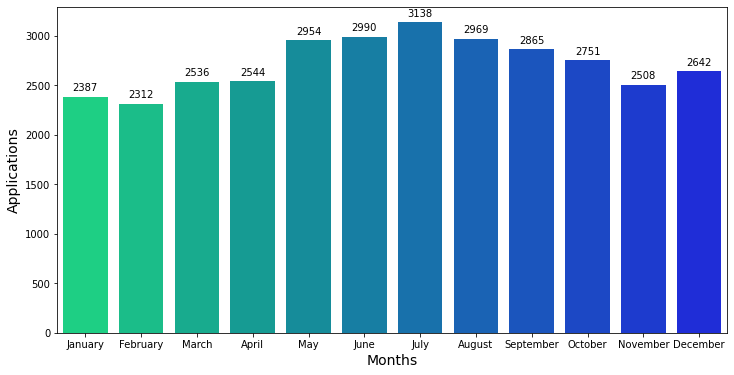

In [24]:
plt.figure( figsize=(12, 6))
splot = sns.barplot( x='Month', y='Applications', data=df2, palette= 'winter_r');
plt.xlabel('Months', size=14)
plt.ylabel('Applications', size=14)

# Rotina para anotações dos valores sobre cada coluna:
# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 9), 
    textcoords = 'offset points')
    
plt.savefig('Applications x Months.png') # Exportação do gráfico em formato .png (salvo no diretório corrente):